# Load Packages

In [1]:
using DifferentialEquations
using OrdinaryDiffEq
using DiffEqBase
using Sundials
using ODEInterfaceDiffEq
using Plots
using Measures
using CSV
using DataFrames
# using Turing
# using MCMCChains
using EasyFit
using StatsPlots
using LinearAlgebra
using Random
using Distributions
using OrdinaryDiffEq
using LsqFit
using BlackBoxOptim
using LaTeXStrings

# Cryogel

In [58]:
dat = Matrix(CSV.read("CryogelDiffusion.csv", DataFrame))

┌ Warning: thread = 1 warning: parsed expected 29 columns, but didn't reach end of line around data row: 1. Parsing extra columns and widening final columnset
└ @ CSV C:\Users\dgomez\.julia\packages\CSV\aoJqo\src\file.jl:587


5×30 Matrix{Float64}:
    0.0         3.8        7.6     …   98.8    102.6    106.4    110.2
 1753.41     1377.93    1158.71       391.228  412.625  406.057  408.563
 1934.87     1039.72     719.665      322.335  324.151  321.366  326.043
    3.15814    28.4329    57.8675     336.131  334.191  325.622  338.778
  117.395     137.111    164.922      268.336  262.346  255.534  261.919

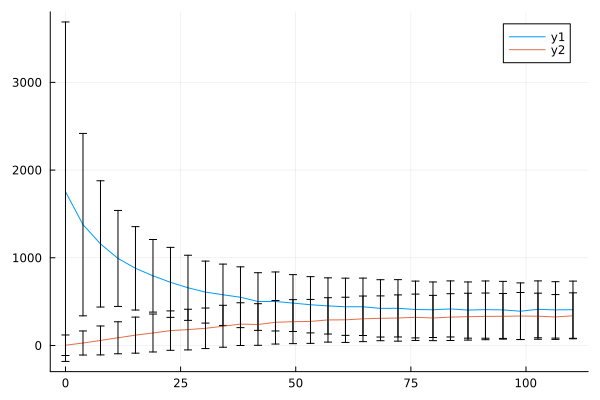

In [59]:
plot(dat[1,:], dat[2,:], errorbar = dat[3,:])
plot!(dat[1,:], dat[4,:], errorbar = dat[5,:])

16.493253433880888


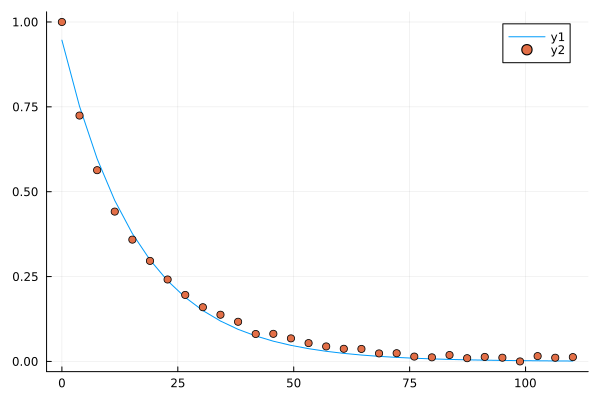

In [60]:
m(t,p) =  p[1].*exp.(-t.*p[2])
p0 = [dat[2,1], 0.1]

fit = curve_fit(m, dat[1,:], (dat[2,:].-minimum(dat[2,:]))./(maximum(dat[2,:]).-minimum(dat[2,:])), p0)

pp=plot(dat[1,:], m(dat[1,:], coef(fit)))
scatter!(dat[1,:], (dat[2,:].-minimum(dat[2,:]))./(maximum(dat[2,:]).-minimum(dat[2,:])))

println(1/coef(fit)[2])

t12 = 1/coef(fit)[2];

pp

101.08693568366627


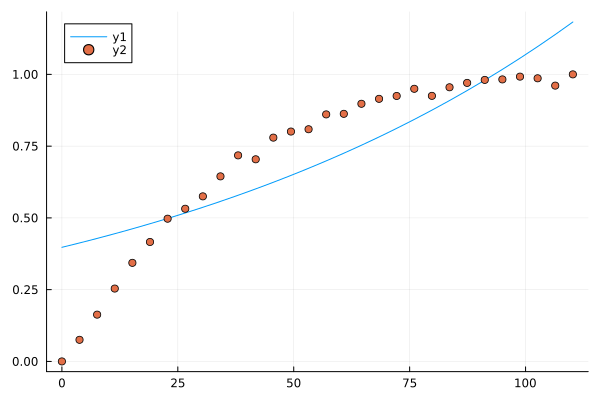

In [80]:
m2(t,p) =  p[1].*exp.(t.*p[2])
p0 = [dat[4,1], 0.1]

fita = curve_fit(m2, dat[1,:], (dat[4,:].-minimum(dat[4,:]))./(maximum(dat[4,:]).-minimum(dat[4,:])), p0)

pp=plot(dat[1,:], m2(dat[1,:], coef(fita)))
scatter!(dat[1,:], (dat[4,:].-minimum(dat[4,:]))./(maximum(dat[4,:]).-minimum(dat[4,:])))

println(1/coef(fita)[2])

t12 = 1/coef(fita)[2];

pp

# Hydrogel

In [61]:
dat2 = Matrix(CSV.read("HydrogelDiffusion.csv", DataFrame))

┌ Warning: thread = 1 warning: parsed expected 68 columns, but didn't reach end of line around data row: 1. Parsing extra columns and widening final columnset
└ @ CSV C:\Users\dgomez\.julia\packages\CSV\aoJqo\src\file.jl:587


5×69 Matrix{Float64}:
    0.0       3.8       7.6      11.4    …   250.8     254.6     258.4
 7418.27   3468.13   2573.17   2228.8       1256.87   1284.75   1275.46
 3621.58   1464.68    929.711   707.689      296.538   301.117   290.101
  302.639   393.527   451.641   460.384      682.762   668.417   684.232
  621.428   652.895   632.569   574.425      380.164   378.207   384.547

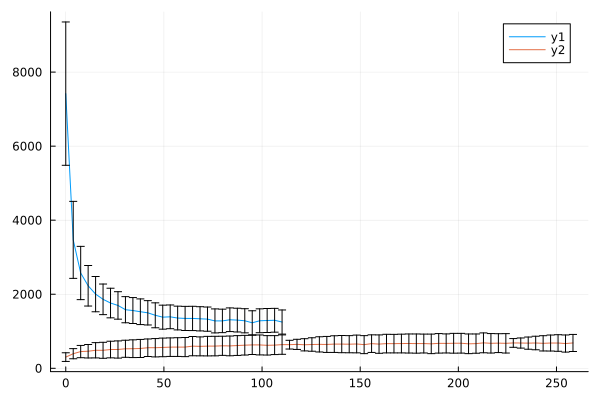

In [62]:
plot(dat2[1,1:30], dat2[2,1:30], errorbar = dat[3,:])
plot!(dat2[1,:], dat2[4,:], errorbar = dat[5,:])

5.327365988862596


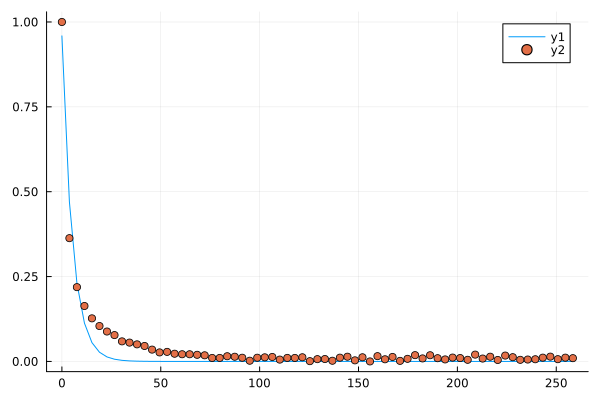

In [79]:
m(t,p) =  p[1].*exp.(-t.*p[2])
p0 = [dat2[2,1], 0.1]

fit2 = curve_fit(m, dat2[1,:], (dat2[2,:].-minimum(dat2[2,:]))./(maximum(dat2[2,:]).-minimum(dat2[2,:])), p0)

pp=plot(dat2[1,:], m(dat2[1,:], coef(fit2)))
scatter!(dat2[1,:], (dat2[2,:].-minimum(dat2[2,:]))./(maximum(dat2[2,:]).-minimum(dat2[2,:])))

println(1/coef(fit2)[2])

t12 = 1/coef(fit2)[2];

pp

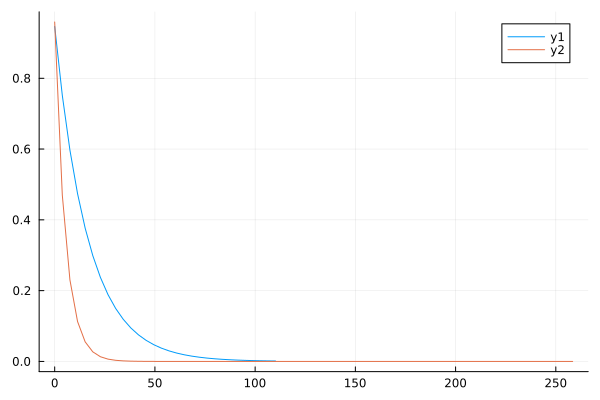

In [64]:
pp=plot(dat[1,:], m(dat[1,:], coef(fit)))
plot!(dat2[1,:], m(dat2[1,:], coef(fit2)))

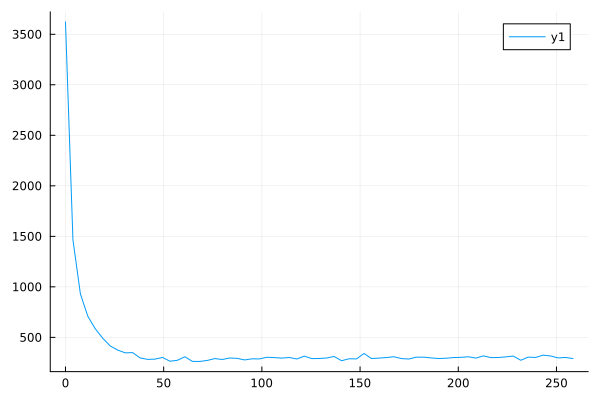

In [89]:
m2(t,d,p) =  (p[1]*d)/(p[2]+d)

plot(dat2[1,:], dat2[3,:], [1,100])

0.016752070579279455


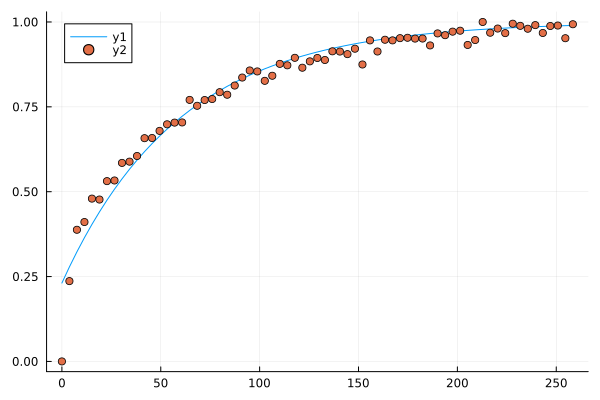

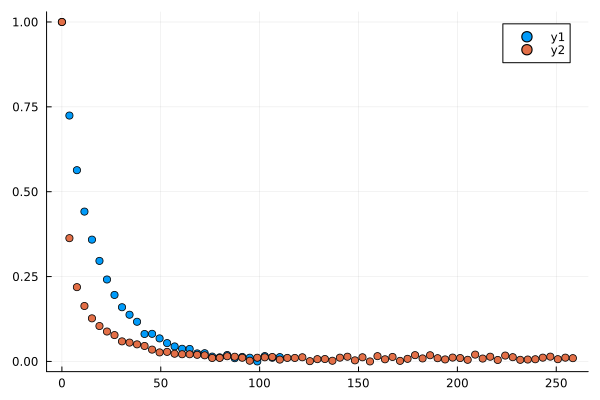

In [83]:
scatter(dat[1,:], (dat[2,:].-minimum(dat[2,:]))./(maximum(dat[2,:]).-minimum(dat[2,:])))
scatter!(dat2[1,:], (dat2[2,:].-minimum(dat2[2,:]))./(maximum(dat2[2,:]).-minimum(dat2[2,:])))

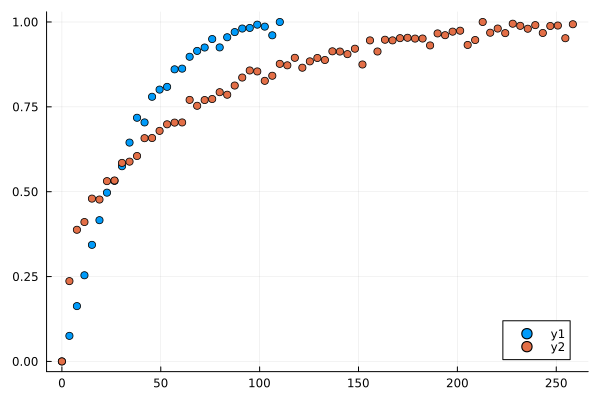

In [82]:
scatter(dat[1,:], (dat[4,:].-minimum(dat[4,:]))./(maximum(dat[4,:]).-minimum(dat[4,:])))
scatter!(dat2[1,:], (dat2[4,:].-minimum(dat2[4,:]))./(maximum(dat2[4,:]).-minimum(dat2[4,:])))


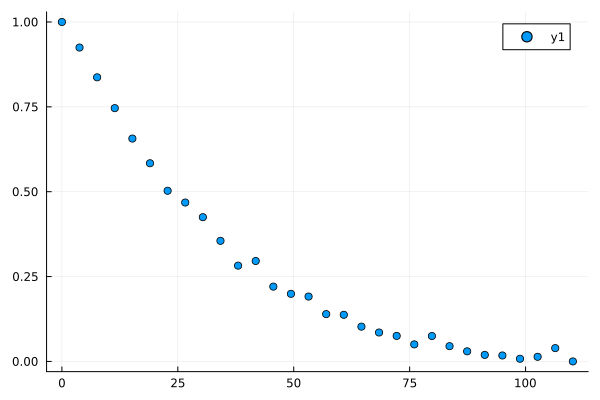

In [110]:
scatter(dat[1,:], (dat[4,:].-minimum(dat[4,:]))./(maximum(dat[4,:]).-minimum(dat[4,:]))./-1 .+1)


0.033132701687394725


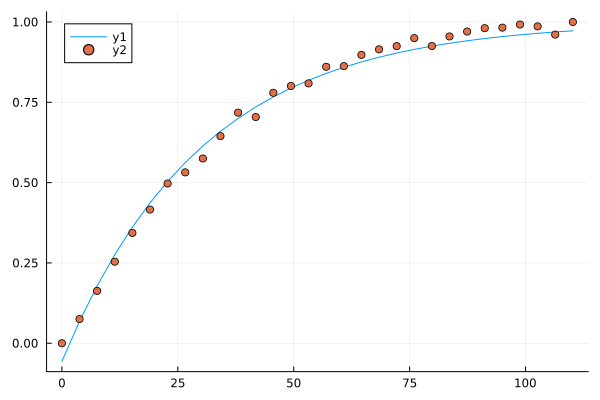

In [131]:
m2(t,p) =  p[1].*exp.(-t.*p[2])

p0 = [dat[4,1], 0.1]

fita = curve_fit(m2, dat[1,:], (dat[4,:].-minimum(dat[4,:]))./(maximum(dat[4,:]).-minimum(dat[4,:]))./-1 .+1, p0)

pp=plot(dat[1,:], m2(dat[1,:], coef(fita))./-1 .+1)
scatter!(dat[1,:], (dat[4,:].-minimum(dat[4,:]))./(maximum(dat[4,:]).-minimum(dat[4,:])))

println(coef(fita)[2])

t1 = coef(fita)[2];

pp

0.016752070579279455


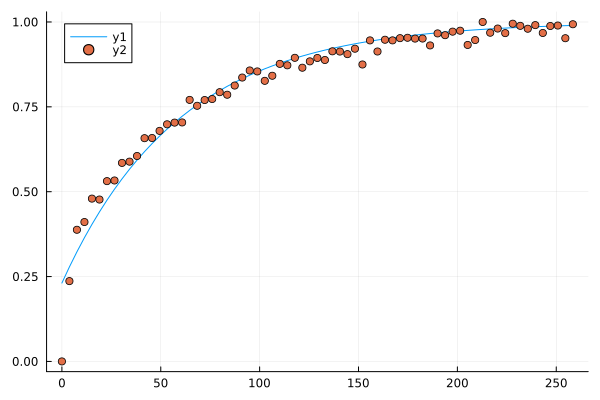

In [132]:
m2(t,p) =  p[1].*exp.(-t.*p[2])

p0 = [dat2[4,1], 0.1]

fita = curve_fit(m2, dat2[1,:], (dat2[4,:].-minimum(dat2[4,:]))./(maximum(dat2[4,:]).-minimum(dat2[4,:]))./-1 .+1, p0)

pp=plot(dat2[1,:], m2(dat2[1,:], coef(fita))./-1 .+1)
scatter!(dat2[1,:], (dat2[4,:].-minimum(dat2[4,:]))./(maximum(dat2[4,:]).-minimum(dat2[4,:])))

println(coef(fita)[2])

t2 = coef(fita)[2];

pp

In [137]:
t1\t2*100

50.56053302665852

In [134]:
t1

0.033132701687394725

In [135]:
t1*0.5

0.016566350843697362

In [136]:
t2

0.016752070579279455